# THE SPARK FOUNDATION INTERNSHIP
By: Manisha Anand

##Task 2 : Supervised Machine Learning Algorithm

*Simple Linear Regression*

Simple Linear Regression is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable and finds a linear function that, as accurately as possible, predicts the dependent variable values as a function of the independent variable.

The formula for simple Linear Regression is: *$y = mX + \beta_0 $*

where: 

$y$ -- the dependent variable (the one we're trying to predict)

$X$ -- the independent variable (the one we're using as a predictor for y)

$\beta_0 $ -- the intercept

$m$ -- the coefficient of $X$; it tells us how much y will change for a unit change in x

$m$ and $\beta_0$ are the model coefficients, this values are learned during the model fitting process.


*Our Objective:*

In this regression task we will predict the percentage of marks that a student is expected to score baseed upon the number of hours they studied,this is a simple linear regression task as it involves just two variables.

In [26]:
# Importing neccessary libraries for doing the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance

In [5]:
# Reading the dataset from the given url
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA of DATASET

In [18]:
dataset.describe().T   

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [19]:
#Correlation Analysis
correlation=dataset.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


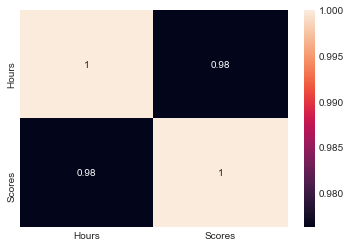

In [17]:
sns.heatmap(dataset.corr(),annot=True)

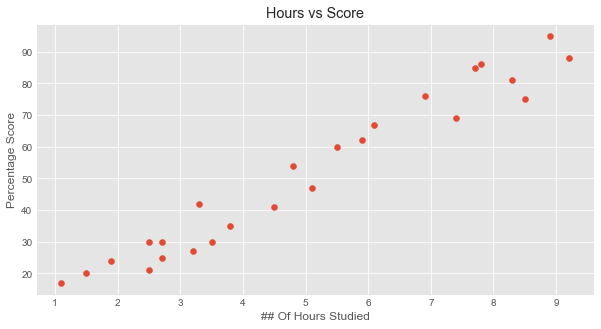

In [21]:
#Plotting the distribution of scores
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 10, 5
plt.scatter(data=dataset, x="Hours", y="Scores")
plt.title("Hours vs Score")
plt.xlabel("## Of Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

=> From the graph we can clearly see that there is a positive linear relation between the hours and percentage of scores. 

=> As, the study hours increases, the scores impoves. 

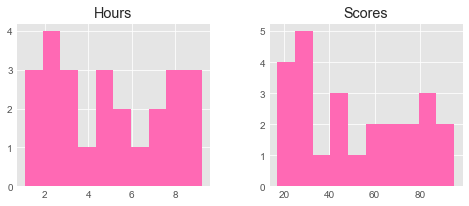

In [54]:
##PLOT
dataset.hist(figsize = (8,3),color='hotpink')
plt.style.use('ggplot')
plt.show()

=> We observed that the average maximum percentage of scores is between 20 and 40 with respect to hours of study.

# Data Preparation

In [65]:
#Training and Testing DATASETS
X = dataset["Hours"].values.reshape(-1,1)
y = dataset["Scores"].values.reshape(-1,1)

In [56]:
# Now we have our X and y we will do train/test split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Our Model

In [57]:
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train)

LinearRegression()

In [58]:
m = lin_reg.coef_
b = lin_reg.intercept_
m, b

(array([[9.68207815]]), array([2.82689235]))

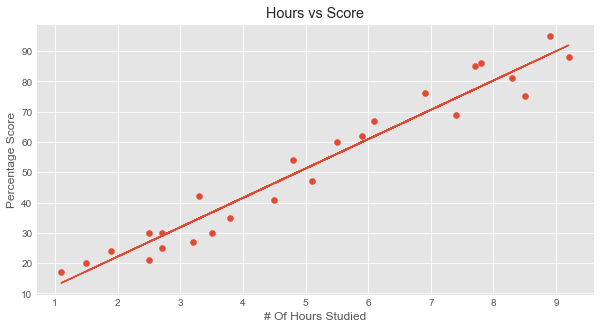

In [59]:
# Let's plot the predicted best fit line (regression line)
m = lin_reg.coef_
b = lin_reg.intercept_
plt.scatter(X, y)
plt.plot(X, m*X+b)
plt.title("Hours vs Score")
plt.xlabel("# Of Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Predictons

In [60]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [61]:
y_test

array([[81],
       [30],
       [21],
       [76],
       [62]], dtype=int64)

In [62]:
# We will use RMSE (Root Mean Squared Error) as an error metric 
from sklearn.metrics import mean_squared_error as mse
print("Root Mean Squared Error:", np.sqrt(mse(y_test, y_pred)))

Root Mean Squared Error: 4.352380006653288


# Predict the score a student will get given the # of hours that student studied for

In [66]:
def score_predictor(hours):
    """
    Given the number of hours studied this function will predict the Score you will get.
    
    input
    hours -- The number of hours you studied, it should be numerical 
    
    output
    score -- The score in percentage out of 100
    """
    m = lin_reg.coef_
    b = lin_reg.intercept_
    try: 
        hrs = float(hours)
        hrs = np.array(hrs).reshape(-1,1)
        score = np.round(m*hrs + b, 2)
        score = 0 if score<0 else score
        score = 100 if score>100 else score 
        print(f"You have studied for {float(hrs)}hrs and it's predicted that you will get a Score of {float(score)}.")
    except:
        print("Enter a valid number!")

In [67]:
score_predictor(hours=9.25)

You have studied for 9.25hrs and it's predicted that you will get a Score of 92.39.


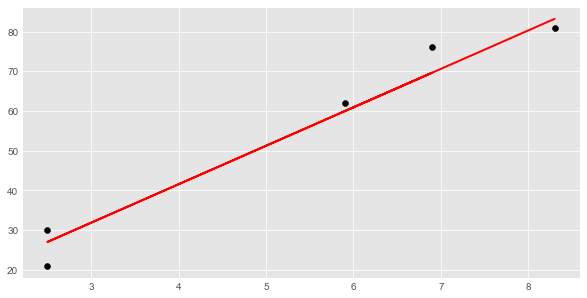

In [69]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='red',linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is correct.

In [70]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


# Conclusion

The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean squared error.There are many such metrics.

The value of root mean squared error is 4.35. It is less than 10% of the mean value of the percentage of all the student i.e.51.48.

# Thank -You